In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:\\Users\\user\\Downloads\\airline_stats.csv\\airline_stats.csv")
df.head() 

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [5]:
df['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [7]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [9]:
## 수치형 변수의 통계량 확인

df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [11]:
# 항공사 별로 기술 통계량 확인
df.groupby('airline')['pct_carrier_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,3.521889,2.483224,0.0,1.935484,3.225806,4.685599,22.290323
American,5723.0,9.042180,4.139067,0.0,6.338538,8.428571,10.988763,50.000000
Delta,9095.0,6.333460,4.695292,0.0,3.813989,5.548387,7.821952,100.000000
Jet Blue,3773.0,8.081843,3.797737,0.0,5.341176,7.657895,10.280000,28.000000
Southwest,5584.0,7.521997,3.345085,0.0,5.070294,6.960930,9.354839,24.800000
United,5414.0,7.398833,5.369283,0.0,4.034708,6.445210,9.633110,100.000000


### 항공사별 지연율 데이터 관점

- **Alaska**와 **Delta**: 평균 지연율이 낮고, 전반적으로 안정적인 지연율
- **American**: 중간 수준의 지연율 분포를 보임
- **Jet Blue**: 지연율 분포가 다소 넓고, 최대 지연율이 66.8%
- **Southwest**와 **United**: 상대적으로 높은 지연율

각 항공사는 지연율 분포가 다르게 나타나며, United가 가장 큰 변동성을 보임.

In [13]:
df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

In [15]:
## 결측치 확인!

df.isnull().sum() #간단하게 결측치를 확인

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

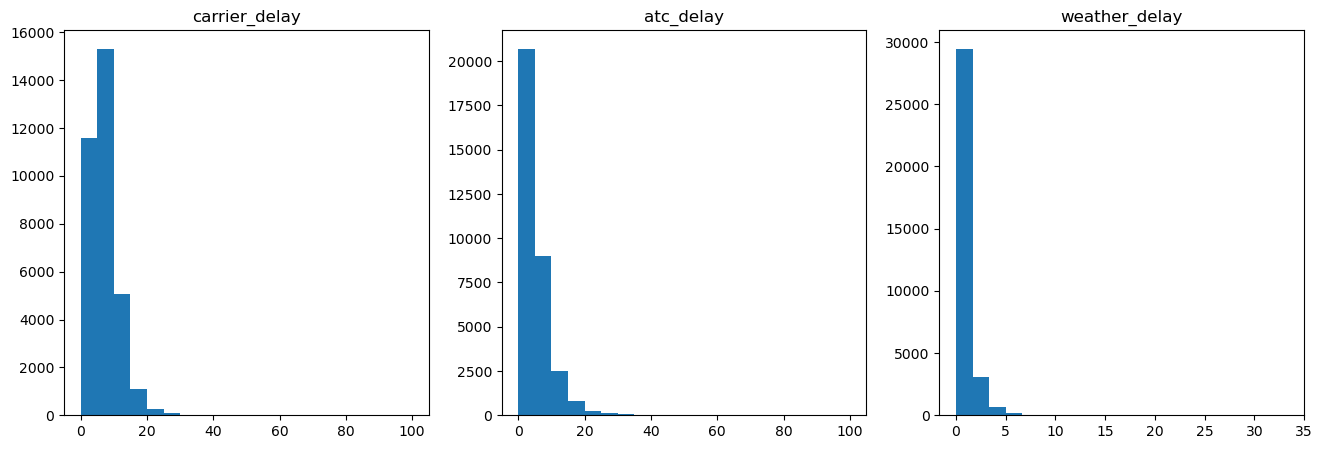

In [20]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df['pct_carrier_delay'], bins=20)
ax2.hist(df['pct_atc_delay'], bins=20)
ax3.hist(df['pct_weather_delay'], bins=20)

ax1.set_title('carrier_delay')
ax2.set_title('atc_delay')
ax3.set_title('weather_delay')

plt.show()

#### 지연 유형별 분포 분석 요약

1. **항공사 지연**: 대부분의 값이 20% 이하에 집중

2. **ATC 지연**: 항공사 지연보다 낮은 수준에서 분포

3. **날씨 지연**: 중앙값이 작고, 대부분 5% 이하에서 분포 이상치가 적고 다른 요인들에 비해 안정적


<Axes: >

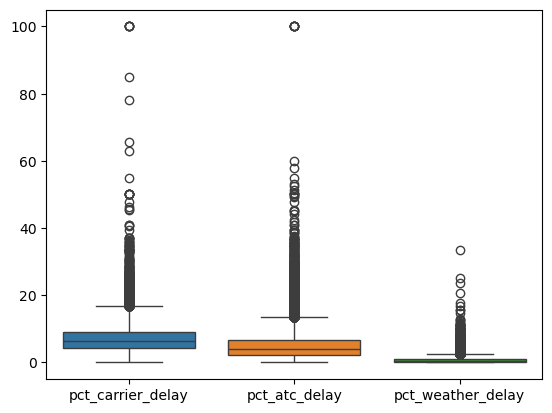

In [23]:
sns.boxplot(data=df)

#### 항공사별 지연 요인 분석 요약

- **Delta와 United**: 중앙값은 다른 항공사에 비해 크게 차이나지 않으나, 이상치가 많음.
- **Alaska**: 상대적으로 지연 발생률이 낮음.
- **전반적인 패턴**: `pct_carrier_delay`와 `pct_atc_delay`에서는 이상치가 두드러지며, `pct_weather_delay`는 전체적으로 낮은 범위에서 분포하여 다른 요인보다 영향이 적습니다.다만 실제적인 문제인지는 파악 안되는 듯?


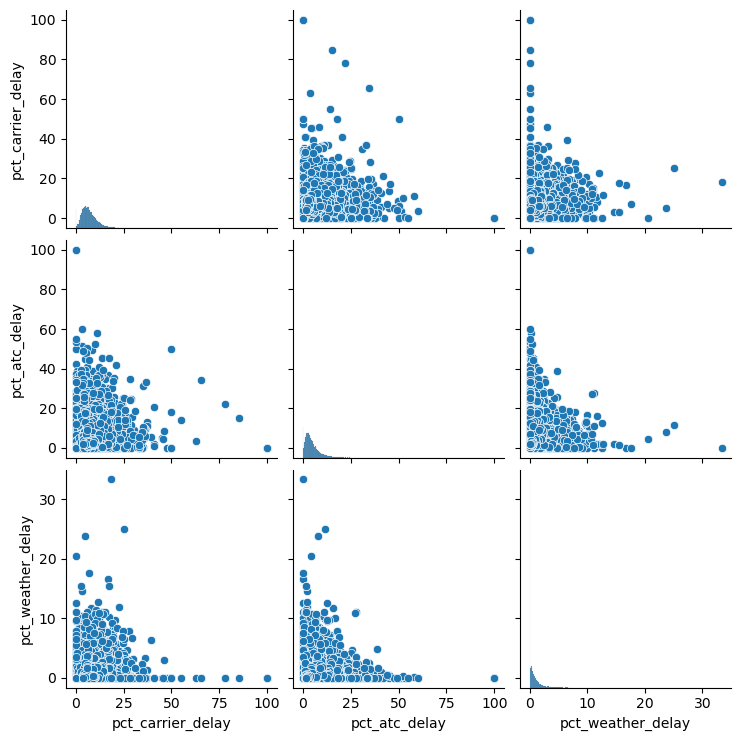

In [26]:
sns.pairplot(df)

#### 지연 요인 간 상관관계 분석 요약

1. **항공사 지연과 ATC 지연**: 상관계수가 0.14로, 약한 양의 상관관, 이는 항공사 지연이 있을 때 ATC 지연도 약간의 영향을 받을 수 있음을 시사

2. **항공사 지연과 날씨 지연**: 상관계수가 0.16으로, 약한 양의 상관관계, 일부 상황에서 두 요인이 동시에 발생할 가능성이 있음

3. **ATC 지연과 날씨 지연**: 상관계수가 0.09로 거의 독립적, 서로 영향을 주지 않고 독립적으로 발생하는 경향이 강함


In [28]:
## 상관관계를 시각화

cor_matrix = df.corr(numeric_only=True)
cor_matrix

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


<Axes: >

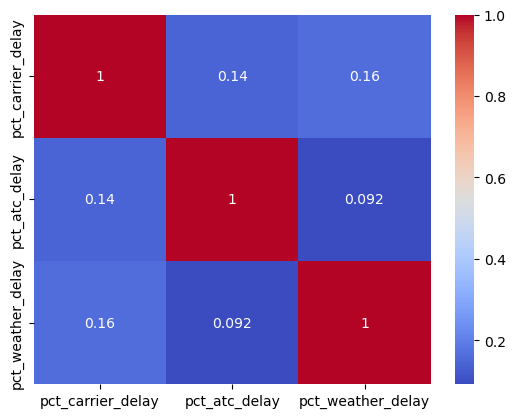

In [41]:
sns.heatmap(cor_matrix, annot=True, cmap = 'coolwarm')

In [30]:
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33440 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33440 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [ ]:
# 결측치가 제거된 데이터로 시각적분석, 상관관계 분석을 수행하여 비교해보기

In [32]:
# 기본데이터
df.groupby('airline')['pct_carrier_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,3.521889,2.483224,0.0,1.935484,3.225806,4.685599,22.290323
American,5723.0,9.042180,4.139067,0.0,6.338538,8.428571,10.988763,50.000000
Delta,9095.0,6.333460,4.695292,0.0,3.813989,5.548387,7.821952,100.000000
Jet Blue,3773.0,8.081843,3.797737,0.0,5.341176,7.657895,10.280000,28.000000
Southwest,5584.0,7.521997,3.345085,0.0,5.070294,6.960930,9.354839,24.800000
United,5414.0,7.398833,5.369283,0.0,4.034708,6.445210,9.633110,100.000000


In [34]:
# 결측치 제거 데이터
df_cleaned.groupby('airline')['pct_carrier_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,3.521889,2.483224,0.0,1.935484,3.225806,4.685599,22.290323
American,5723.0,9.042180,4.139067,0.0,6.338538,8.428571,10.988763,50.000000
Delta,9095.0,6.333460,4.695292,0.0,3.813989,5.548387,7.821952,100.000000
Jet Blue,3773.0,8.081843,3.797737,0.0,5.341176,7.657895,10.280000,28.000000
Southwest,5584.0,7.521997,3.345085,0.0,5.070294,6.960930,9.354839,24.800000
United,5414.0,7.398833,5.369283,0.0,4.034708,6.445210,9.633110,100.000000


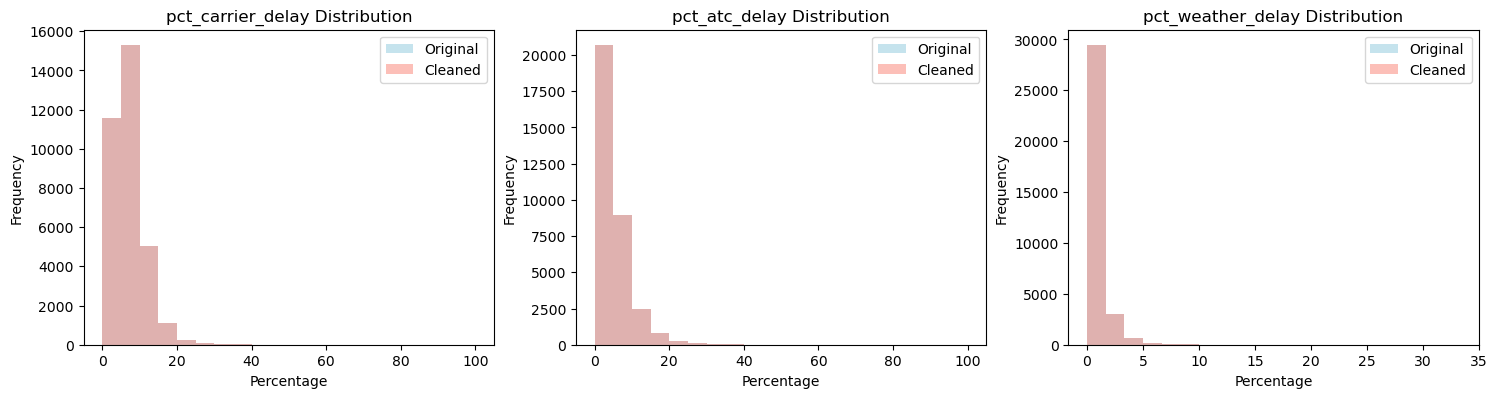

In [36]:
# 히스토그램 비교
plt.figure(figsize=(18, 9)) #사이즈 제한
for i, col in enumerate(['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], bins=20, color='lightblue', alpha=0.7, label='Original')
    plt.hist(df_cleaned[col], bins=20, color='salmon', alpha=0.5, label='Cleaned')
    plt.title(f'{col} Distribution')
    plt.xlabel('Percentage')
    plt.ylabel('Frequency')
    plt.legend()

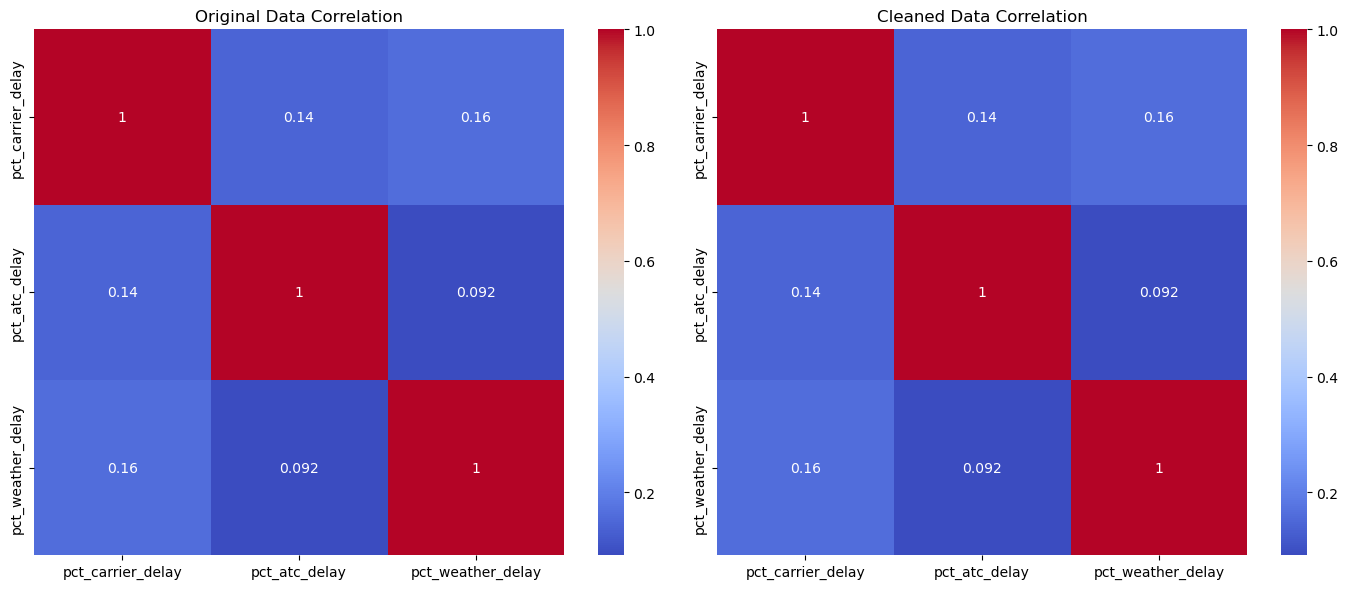

In [38]:
cor_matrix_cleaned = df_cleaned[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr() # 결측치 제거 후 데이터의 상관관계 계산
plt.figure(figsize=(14, 6)) #좋게 보이게 하려고 fig사이즈 조정 

# 원본 데이터 히트맵
plt.subplot(1, 2, 1)
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Original Data Correlation')

# 결측치 제거 후 데이터 히트맵
plt.subplot(1, 2, 2)
sns.heatmap(cor_matrix_cleaned, annot=True, cmap='coolwarm')
plt.title('Cleaned Data Correlation')

plt.tight_layout()

<Figure size 1400x1000 with 0 Axes>

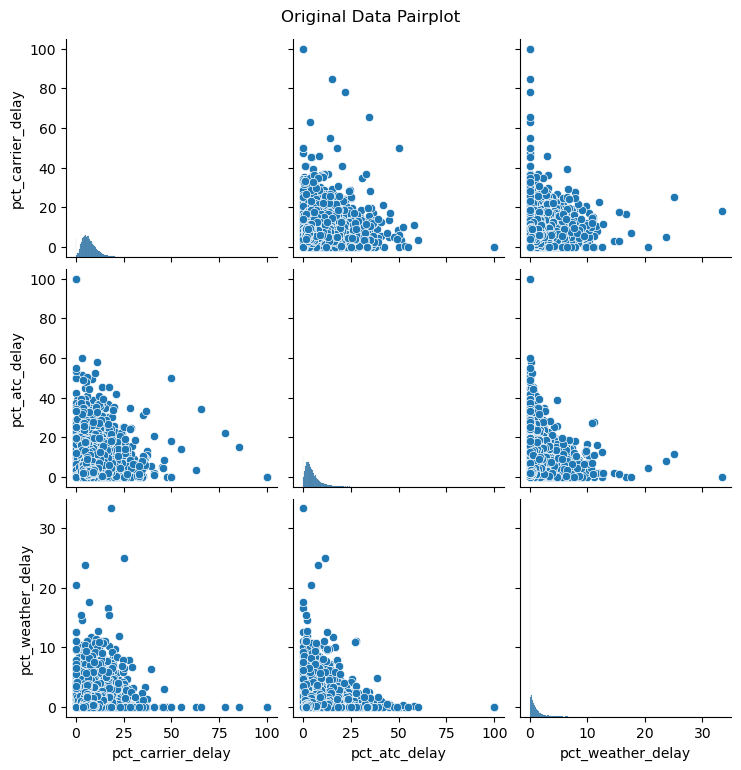

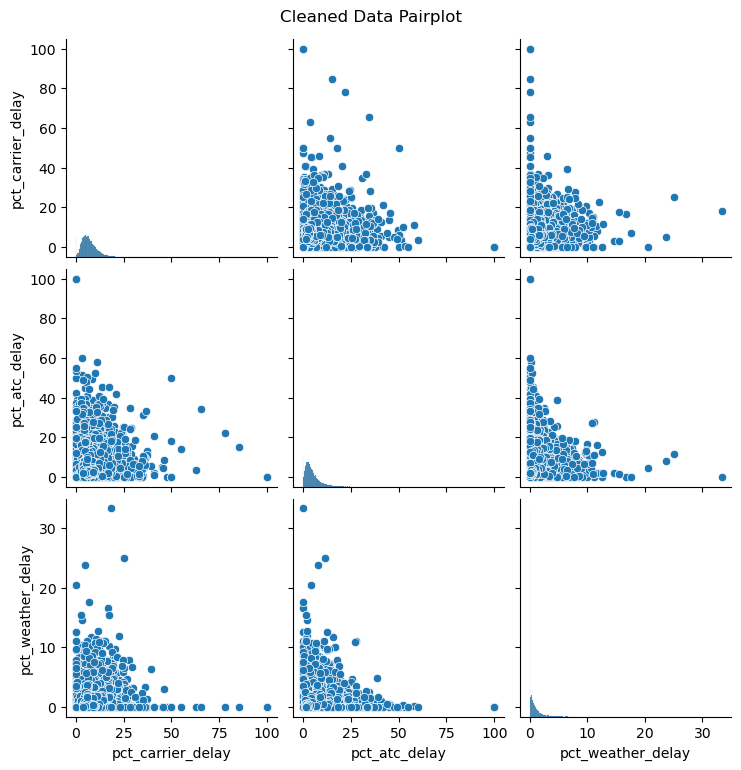

In [40]:
# Pairplot 비교
plt.figure(figsize=(14, 10))  # 전체 사이즈를 조정

# 원본 데이터
sns.pairplot(df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']], height=2.5, aspect=1)
plt.suptitle("Original Data Pairplot", y=1.02)  # 제목 위치 조정

# 결측치 제거 후
sns.pairplot(df_cleaned[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']], height=2.5, aspect=1)
plt.suptitle("Cleaned Data Pairplot", y=1.02)

plt.show()

#### 결측치 제거 전후 데이터 비교 결론
결측치를 제거한 데이터(`df_cleaned`)와 원본 데이터(`df`)는 주요 분포와 상관관계에서 차이가 없어, **결측치가 분석 결과에 미치는 영향이 미미**하다고 판단.
